<a href="https://colab.research.google.com/github/mnskartik/CodEvo-Solutions-ML/blob/main/SALES_FOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('/content/Advertising.csv')

In [3]:
data = data.dropna()

In [5]:
scaler = StandardScaler()
data[['TV', 'Radio', 'Newspaper']] = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])

In [6]:
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for the final layer

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 215.8167 - val_loss: 190.3913
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 210.9473 - val_loss: 189.2701
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 198.0338 - val_loss: 188.1903
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 212.9499 - val_loss: 187.1617
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 211.0962 - val_loss: 186.2049
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 210.0403 - val_loss: 185.3202
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 207.1289 - val_loss: 184.5356
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 200.0356 - val_loss: 183.8477
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 202.9868 - val_loss: 183.2582
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 202.3489 - val_loss: 182.7533
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 210.1878 - val_loss: 182.3274
Epoch 12/100
4/4 ━━━━━━━━━━━━━

In [9]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 190.0237 
Test Loss: 193.1826171875


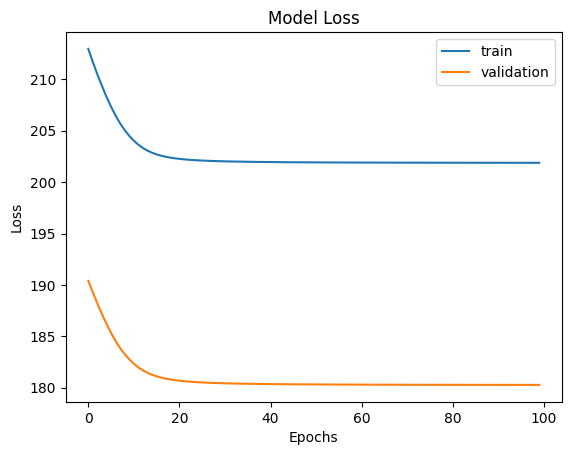

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
y_pred = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [12]:
max_sales = y.max()  # Maximum sales in the dataset
y_pred_actual = y_pred * max_sales


In [13]:

future_data = np.array([[200, 30, 15],  # Example 1
                        [180, 45, 20]])  # Example 2


future_data_scaled = scaler.transform(future_data)


predicted_sales_future = model.predict(future_data_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:



predicted_sales_actual_future = predicted_sales_future * max_sales


print("Predicted future sales amounts:")
for i, sales in enumerate(predicted_sales_actual_future):
    print(f"Example {i+1}: {sales[0]:.2f} units")


Predicted future sales amounts:
Example 1: 26.97 units
Example 2: 26.99 units
